> ## Formulación del problema

Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:

* Customer ID
* Gender
* Age
* Annual Income
* Spending Score - Score assigned by the shop, based on customer behavior and spending nature
* Profession
* Work Experience - in years
* Family Size

> ## Recolección de datos
* #### Link: https://www.kaggle.com/datasets/datascientistanna/customers-dataset

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customers-dataset/Customers.csv


In [2]:
data = pd.read_csv("/kaggle/input/customers-dataset/Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


> ## Exploración de datos

In [3]:
data.shape

(2000, 8)

In [4]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [5]:
data.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


### Descripción del dataset
* #### Contiene 2000 filas y 8 columnas/variables.
* #### Hay dos variables categóricas y 6 numéricas.
* #### Hay 35 valores nulos en la columna "Profession".
* #### No tiene filas duplicadas.

### Análisis de variables.
* ### Variables numéricas

In [8]:
var_num = [col for col in data.columns if data[col].dtypes not in ["object"]]
var_cat = [col for col in data.columns if data[col].dtypes in ["object"]]
var_num, var_cat

(['CustomerID',
  'Age',
  'Annual Income ($)',
  'Spending Score (1-100)',
  'Work Experience',
  'Family Size'],
 ['Gender', 'Profession'])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


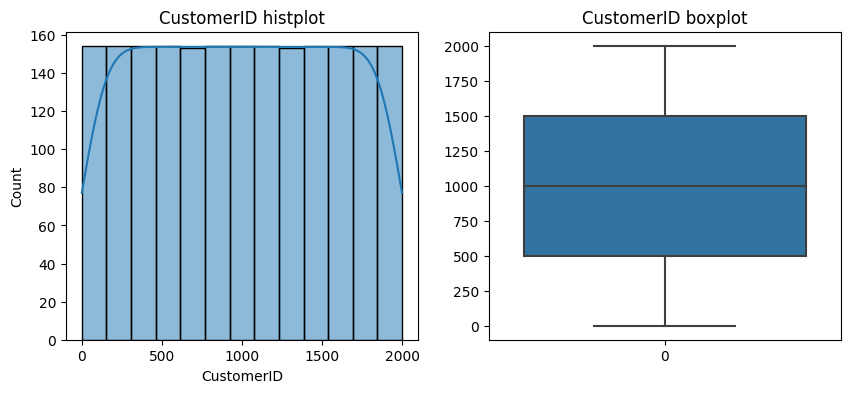

count    2000.000000
mean     1000.500000
std       577.494589
min         1.000000
25%       500.750000
50%      1000.500000
75%      1500.250000
max      2000.000000
Name: CustomerID, dtype: float64

------------------------------------------------------------------------------------------------------------------------


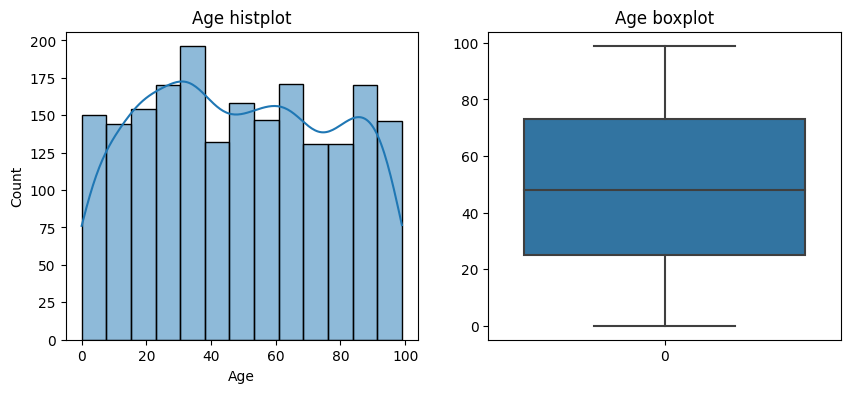

count    2000.000000
mean       48.960000
std        28.429747
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64

------------------------------------------------------------------------------------------------------------------------


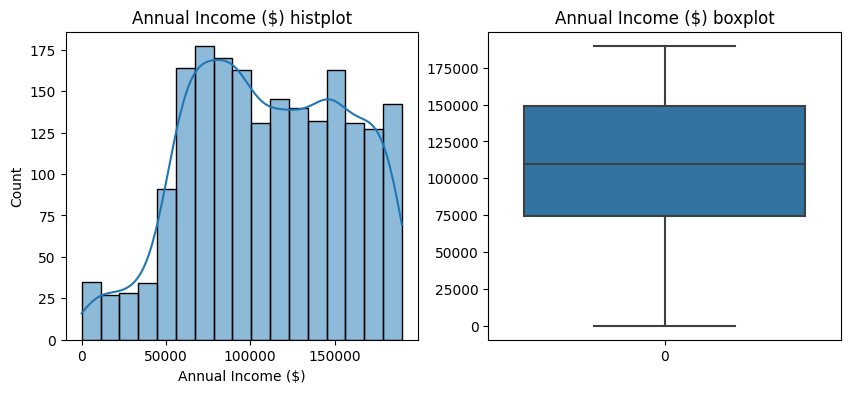

count      2000.000000
mean     110731.821500
std       45739.536688
min           0.000000
25%       74572.000000
50%      110045.000000
75%      149092.750000
max      189974.000000
Name: Annual Income ($), dtype: float64

------------------------------------------------------------------------------------------------------------------------


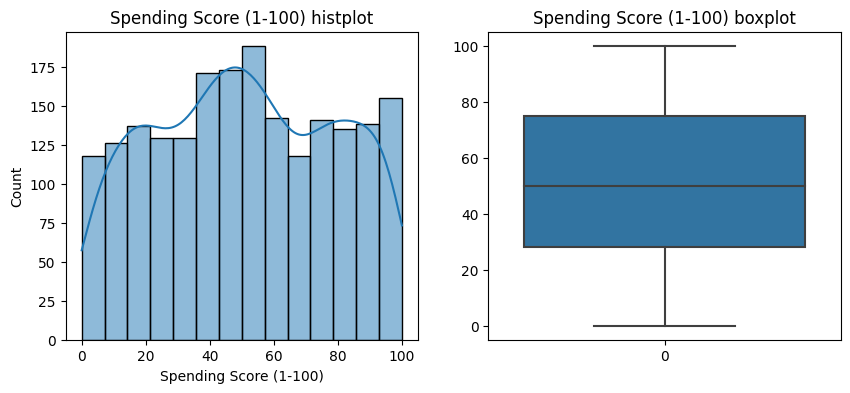

count    2000.000000
mean       50.962500
std        27.934661
min         0.000000
25%        28.000000
50%        50.000000
75%        75.000000
max       100.000000
Name: Spending Score (1-100), dtype: float64

------------------------------------------------------------------------------------------------------------------------


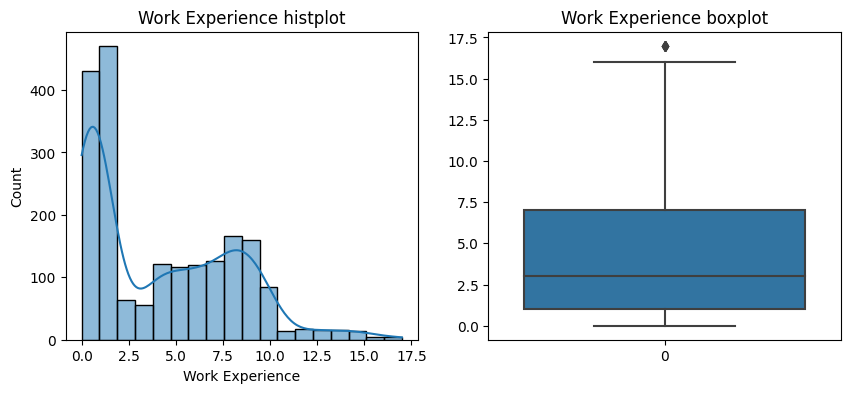

count    2000.000000
mean        4.102500
std         3.922204
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: Work Experience, dtype: float64

------------------------------------------------------------------------------------------------------------------------


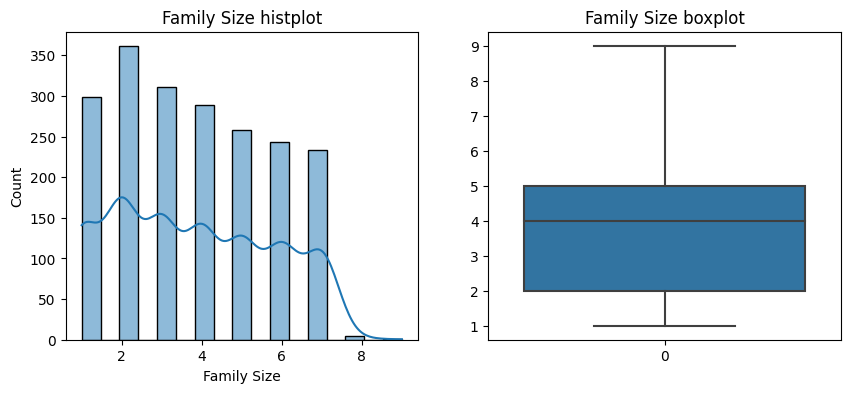

count    2000.000000
mean        3.768500
std         1.970749
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: Family Size, dtype: float64

------------------------------------------------------------------------------------------------------------------------


In [10]:
for col in var_num:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(x=data[col], kde=True)
    plt.title(col+" histplot")
    
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.title(col+" boxplot")
    
    plt.show()
    
    print()
    display(data[col].describe())
    print("-"*120)

* ### Variables categóricas

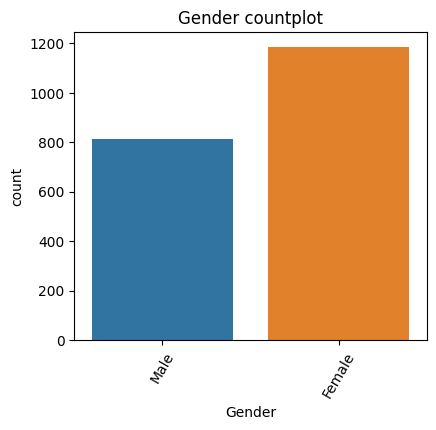

Gender
Female    1186
Male       814
dtype: int64

--------------------------------------------------------------------------------


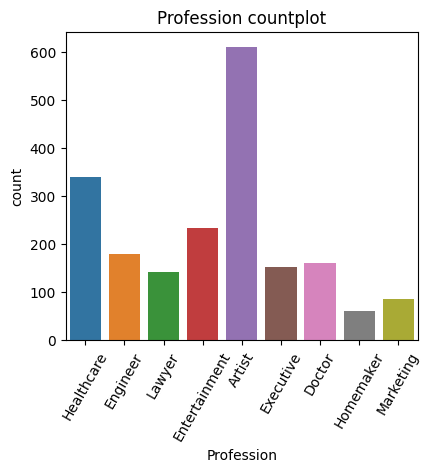

Profession
Artist           612
Doctor           161
Engineer         179
Entertainment    234
Executive        153
Healthcare       339
Homemaker         60
Lawyer           142
Marketing         85
dtype: int64

--------------------------------------------------------------------------------


In [11]:
for col in var_cat:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.countplot(x=data[col])
    plt.xticks(rotation=60)
    plt.title(col+" countplot")
    
    plt.show()
    
    print()
    display(data.groupby(col).size())
    print("-"*80)

> ## Preprocesado de datos.

* #### Eliminar las filas con valores nulos.
* #### Eliminar la columna "CustomerID" ya que no aporta nada en el modelo.
* #### Transformar las variables categóricas en variables dummies.
* #### Normalizar el dataset.

In [12]:
data_copy = data.copy()
data_copy.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [13]:
data_copy.drop(["CustomerID"], axis=1, inplace=True)

In [14]:
for col in var_cat:
    var_dummy = pd.get_dummies(data_copy[col], prefix=col)
    data_copy = pd.concat([data_copy, var_dummy], axis=1)
    data_copy.drop([col], axis=1, inplace=True)

data_copy.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0


In [15]:
data_copy_norm = (data_copy-data_copy.min())/(data_copy.max()-data_copy.min())
data_copy_norm.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0.191919,0.078958,0.39,0.058824,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.212121,0.184236,0.81,0.176471,0.250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.202020,0.452694,0.06,0.058824,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.232323,0.310569,0.77,0.000000,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.313131,0.200027,0.40,0.117647,0.625,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


> ## Modelización.

> * ### KMeans

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

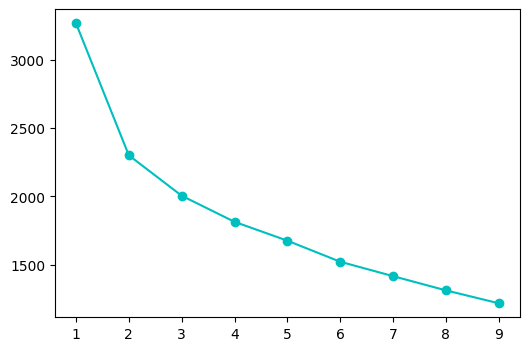

In [17]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10).fit(data_copy_norm) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(6,4))
plt.plot(range(1,10), inertias, "co-")
plt.show()

*Para cada k =  2  el promedio de la silueta es de:  0.28467968559096446
 - Para i =  1  la silueta del cluster vale:  0.2813487503235023
 - Para i =  2  la silueta del cluster vale:  0.2869658418369292


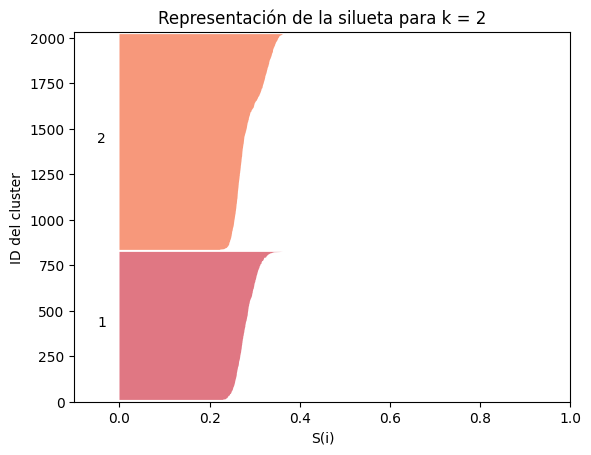

*Para cada k =  3  el promedio de la silueta es de:  0.22512139084071622
 - Para i =  1  la silueta del cluster vale:  0.5218094200705803
 - Para i =  2  la silueta del cluster vale:  0.2311255613772507
 - Para i =  3  la silueta del cluster vale:  0.07917989465698504


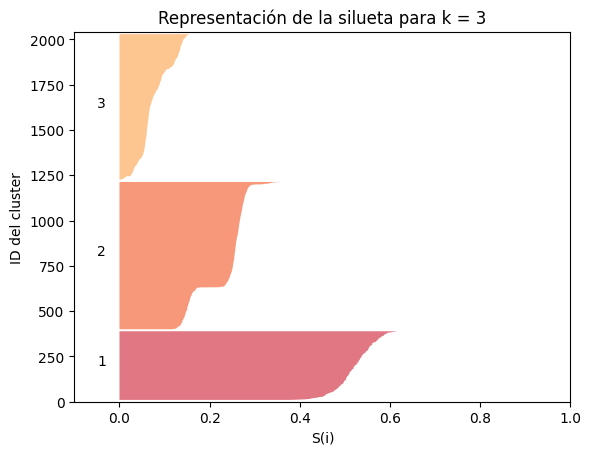

*Para cada k =  4  el promedio de la silueta es de:  0.21517688433280394
 - Para i =  1  la silueta del cluster vale:  0.5138010802223929
 - Para i =  2  la silueta del cluster vale:  0.07917989465698504
 - Para i =  3  la silueta del cluster vale:  0.08431579305602102
 - Para i =  4  la silueta del cluster vale:  0.5217398194786277


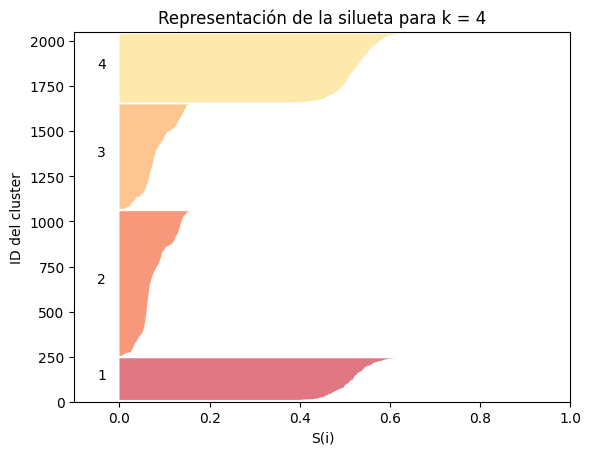

*Para cada k =  5  el promedio de la silueta es de:  0.2584770180834408
 - Para i =  1  la silueta del cluster vale:  0.521177287253867
 - Para i =  2  la silueta del cluster vale:  0.08345272560463324
 - Para i =  3  la silueta del cluster vale:  0.5138010802223929
 - Para i =  4  la silueta del cluster vale:  0.5228734393801452
 - Para i =  5  la silueta del cluster vale:  0.07975759996461003


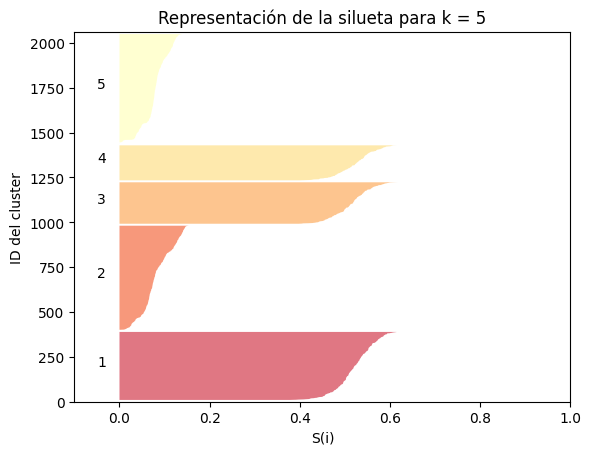

*Para cada k =  6  el promedio de la silueta es de:  0.2900823355649852
 - Para i =  1  la silueta del cluster vale:  0.5233200115235994
 - Para i =  2  la silueta del cluster vale:  0.521177287253867
 - Para i =  3  la silueta del cluster vale:  0.07975759996461003
 - Para i =  4  la silueta del cluster vale:  0.5132459588239345
 - Para i =  5  la silueta del cluster vale:  0.08446002408772187
 - Para i =  6  la silueta del cluster vale:  0.5228540373752626


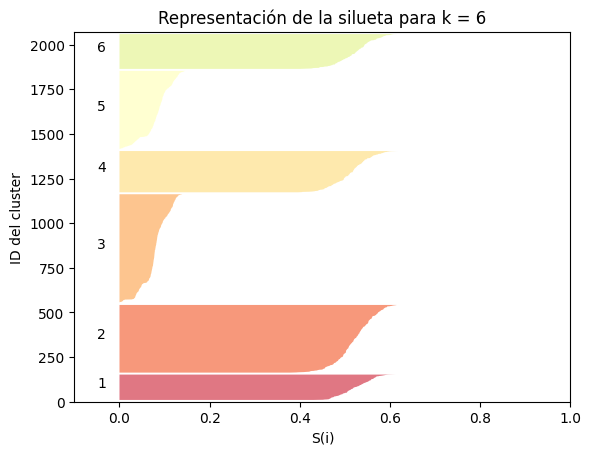

*Para cada k =  7  el promedio de la silueta es de:  0.32137263826678175
 - Para i =  1  la silueta del cluster vale:  0.08839158970340392
 - Para i =  2  la silueta del cluster vale:  0.5233200115235994
 - Para i =  3  la silueta del cluster vale:  0.5132459588239345
 - Para i =  4  la silueta del cluster vale:  0.5205877167230708
 - Para i =  5  la silueta del cluster vale:  0.5222285838795298
 - Para i =  6  la silueta del cluster vale:  0.5228305559848511
 - Para i =  7  la silueta del cluster vale:  0.08418693715005089


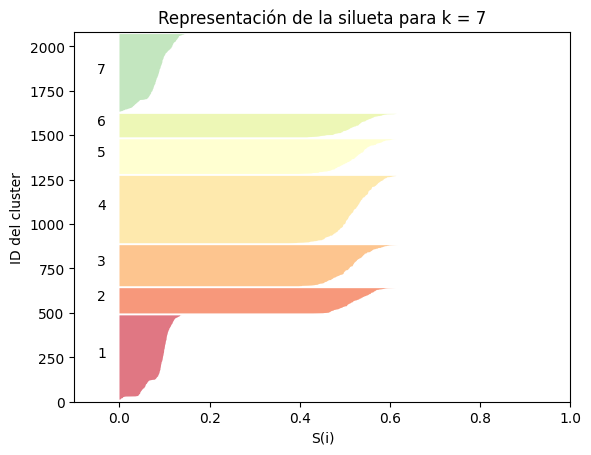

*Para cada k =  8  el promedio de la silueta es de:  0.3448272493977939
 - Para i =  1  la silueta del cluster vale:  0.09432695692489783
 - Para i =  2  la silueta del cluster vale:  0.5205877167230708
 - Para i =  3  la silueta del cluster vale:  0.5220233559011789
 - Para i =  4  la silueta del cluster vale:  0.5119423079677121
 - Para i =  5  la silueta del cluster vale:  0.08839158970340392
 - Para i =  6  la silueta del cluster vale:  0.5223718862354272
 - Para i =  7  la silueta del cluster vale:  0.5222285838795298
 - Para i =  8  la silueta del cluster vale:  0.520135129303014


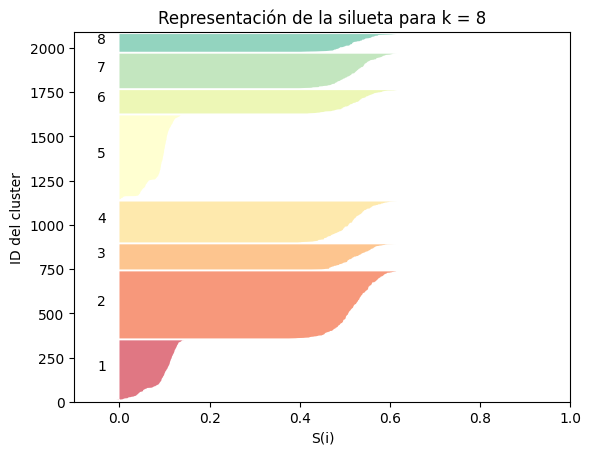

*Para cada k =  9  el promedio de la silueta es de:  0.36485149867556016
 - Para i =  1  la silueta del cluster vale:  0.5115027542228533
 - Para i =  2  la silueta del cluster vale:  0.521010514231833
 - Para i =  3  la silueta del cluster vale:  0.5194112306134742
 - Para i =  4  la silueta del cluster vale:  0.11525679370310683
 - Para i =  5  la silueta del cluster vale:  0.10316817226995882
 - Para i =  6  la silueta del cluster vale:  0.5215804496732505
 - Para i =  7  la silueta del cluster vale:  0.5215988613021395
 - Para i =  8  la silueta del cluster vale:  0.27442962308440355
 - Para i =  9  la silueta del cluster vale:  0.5185284456176558


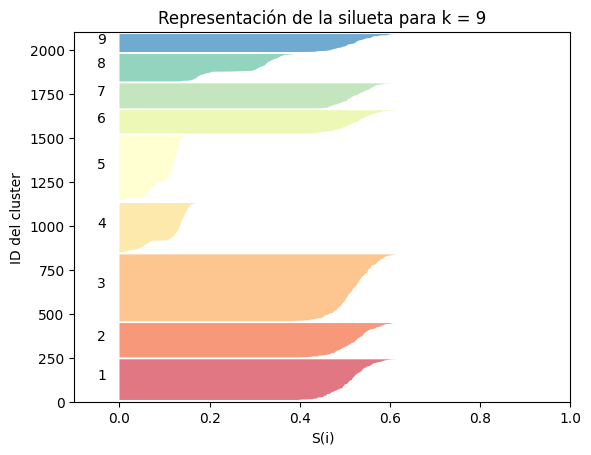

In [18]:
color_palette = [plt.cm.Spectral(float(i)/10) for i in range(1,10)]

for k in range(1,10):
    kmeanmodel = KMeans(n_clusters=k, n_init=10).fit(data_copy_norm)
    centers = pd.DataFrame(kmeanmodel.cluster_centers_)
    labels = kmeanmodel.labels_
    
    if 1<k<len(data_copy_norm):
        _,axis1 = plt.subplots(1,1)
        
        axis1.set_xlim([-0.1,1.0])
        axis1.set_ylim([0, len(data_copy_norm)+ (k+1)*10])
        
        silhouette_avg = silhouette_score(data_copy_norm,labels)
        print("*Para cada k = ",k," el promedio de la silueta es de: ",silhouette_avg)
        sample_silhouette_values = silhouette_samples(data_copy_norm,labels)
        
        y_lower = 10
        for i in range(k):
            ith_cluster_sv = sample_silhouette_values[labels==i]
            print(" - Para i = ",i+1,
                 " la silueta del cluster vale: ",
                 np.mean(ith_cluster_sv))
            ith_cluster_sv.sort()
            
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower,y_upper),
                               0 ,ith_cluster_sv,
                                facecolor=color, alpha=0.7)
            
            axis1.text(-0.05, y_lower+0.5*ith_cluster_size, str(i+1))
            
            y_lower = y_upper + 10
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        
        plt.show()

* #### Por el metodo del codo y el metodo de la silueta considero que el número de clusters óptimo es 2.

In [19]:
kmean = KMeans(n_clusters=2, n_init=10).fit_predict(data_copy_norm)

In [20]:
clust_k = pd.Series(kmean)

In [21]:
data_clust_k = data_copy.copy()

In [22]:
data_clust_k["clust_k"] = clust_k
data_clust_k.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,clust_k
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,0
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,0
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,1
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,1
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,1


In [23]:
data_clust_k[data_clust_k["clust_k"].isnull()]

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,clust_k


In [24]:
data_clust_k.groupby("clust_k").mean()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
clust_k,,,,,,,,,,,,,,,,
0,49.159705,110991.323096,50.944717,4.200246,3.769042,0.0,1.0,0.285012,0.088452,0.093366,0.124079,0.081081,0.175676,0.025799,0.068796,0.039312
1,48.822934,110553.715008,50.974705,4.035413,3.768128,1.0,0.0,0.320405,0.075042,0.086847,0.112142,0.073356,0.165261,0.032884,0.072513,0.044688


In [25]:
for nom, df in data_clust_k.groupby("clust_k"):
    print("Cluster ",nom)
    print()
    display(df)
    print("\n","-"*160,"\n")

Cluster  0



,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,clust_k
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,0
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,0
8,64,97000,3,0,3,0,1,0,0,1,0,0,0,0,0,0,0
10,67,7000,14,1,3,0,1,0,0,1,0,0,0,0,0,0,0
14,37,19000,13,0,1,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,63,59244,80,7,1,0,1,1,0,0,0,0,0,0,0,0,0
1992,94,181183,24,9,3,0,1,0,0,0,0,0,0,0,0,1,0
1997,87,90961,14,9,2,0,1,0,0,0,0,0,1,0,0,0,0
1998,77,182109,4,7,2,0,1,0,0,0,0,1,0,0,0,0,0



 ---------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Cluster  1



,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,clust_k
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,1
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,1
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,1
5,22,58000,76,0,2,1,0,1,0,0,0,0,0,0,0,0,1
6,35,31000,6,1,3,1,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,97,129444,96,5,6,1,0,0,0,0,1,0,0,0,0,0,1
1993,64,175254,100,9,5,1,0,1,0,0,0,0,0,0,0,0,1
1994,19,54121,89,6,3,1,0,0,0,1,0,0,0,0,0,0,1
1995,71,184387,40,8,7,1,0,1,0,0,0,0,0,0,0,0,1



 ---------------------------------------------------------------------------------------------------------------------------------------------------------------- 



In [26]:
data_clust_k["clust_k"].value_counts()

1    1186
0     814
Name: clust_k, dtype: int64

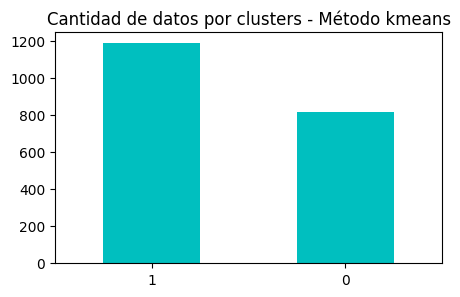

In [27]:
plt.figure(figsize=(5,3))
data_clust_k["clust_k"].value_counts().plot(kind="bar", color="c")
plt.xticks(rotation=0)
plt.title("Cantidad de datos por clusters - Método kmeans")
plt.show()

> * ### Clustering jerárquico

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
data_clust_h = data_copy_norm.copy()

In [30]:
Z = linkage(data_copy_norm, "ward")

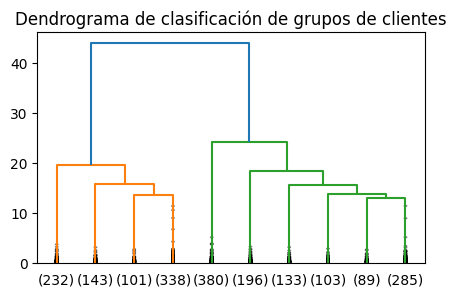

In [31]:
plt.figure(figsize=(5,3))
plt.title("Dendrograma de clasificación de grupos de clientes")
dendrogram(Z, leaf_font_size=10, truncate_mode="lastp",
           p=10, show_leaf_counts=True, show_contracted=True)
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
hierarchy = AgglomerativeClustering(n_clusters=2, linkage="ward").fit_predict(data_copy_norm)

In [34]:
clust_h = pd.Series(hierarchy)

In [35]:
data_clust_h["clust_h"] = clust_h
data_clust_h.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,clust_h
0,0.191919,0.078958,0.39,0.058824,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.212121,0.184236,0.81,0.176471,0.250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.202020,0.452694,0.06,0.058824,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.232323,0.310569,0.77,0.000000,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.313131,0.200027,0.40,0.117647,0.625,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [36]:
data_clust_h[data_clust_h["clust_h"].isnull()]

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,clust_h


In [37]:
data_clust_h.groupby("clust_h").mean()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
clust_h,,,,,,,,,,,,,,,,
0,0.493161,0.581941,0.509747,0.237377,0.346016,1.0,0.0,0.320405,0.075042,0.086847,0.112142,0.073356,0.165261,0.032884,0.072513,0.044688
1,0.496563,0.584245,0.509447,0.247073,0.346130,0.0,1.0,0.285012,0.088452,0.093366,0.124079,0.081081,0.175676,0.025799,0.068796,0.039312


In [38]:
for nom, df in data_clust_h.groupby("clust_h"):
    print("Cluster ",nom)
    print()
    display(df)
    print("\n","-"*160,"\n")

Cluster  0



,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,clust_h
2,0.202020,0.452694,0.06,0.058824,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.232323,0.310569,0.77,0.000000,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.313131,0.200027,0.40,0.117647,0.625,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
5,0.222222,0.305305,0.76,0.000000,0.125,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.353535,0.163180,0.06,0.058824,0.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0.979798,0.681377,0.96,0.294118,0.625,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1993,0.646465,0.922516,1.00,0.529412,0.500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1994,0.191919,0.284886,0.89,0.352941,0.250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1995,0.717172,0.970591,0.40,0.470588,0.750,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



 ---------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Cluster  1



,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,clust_h
0,0.191919,0.078958,0.39,0.058824,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.212121,0.184236,0.81,0.176471,0.250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.646465,0.510596,0.03,0.000000,0.250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,0.676768,0.036847,0.14,0.058824,0.250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14,0.373737,0.100014,0.13,0.000000,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,0.636364,0.311853,0.80,0.411765,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1992,0.949495,0.953725,0.24,0.529412,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1997,0.878788,0.478808,0.14,0.529412,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1998,0.777778,0.958600,0.04,0.411765,0.125,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1



 ---------------------------------------------------------------------------------------------------------------------------------------------------------------- 

